In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/bidirectional_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 179s 13ms/step


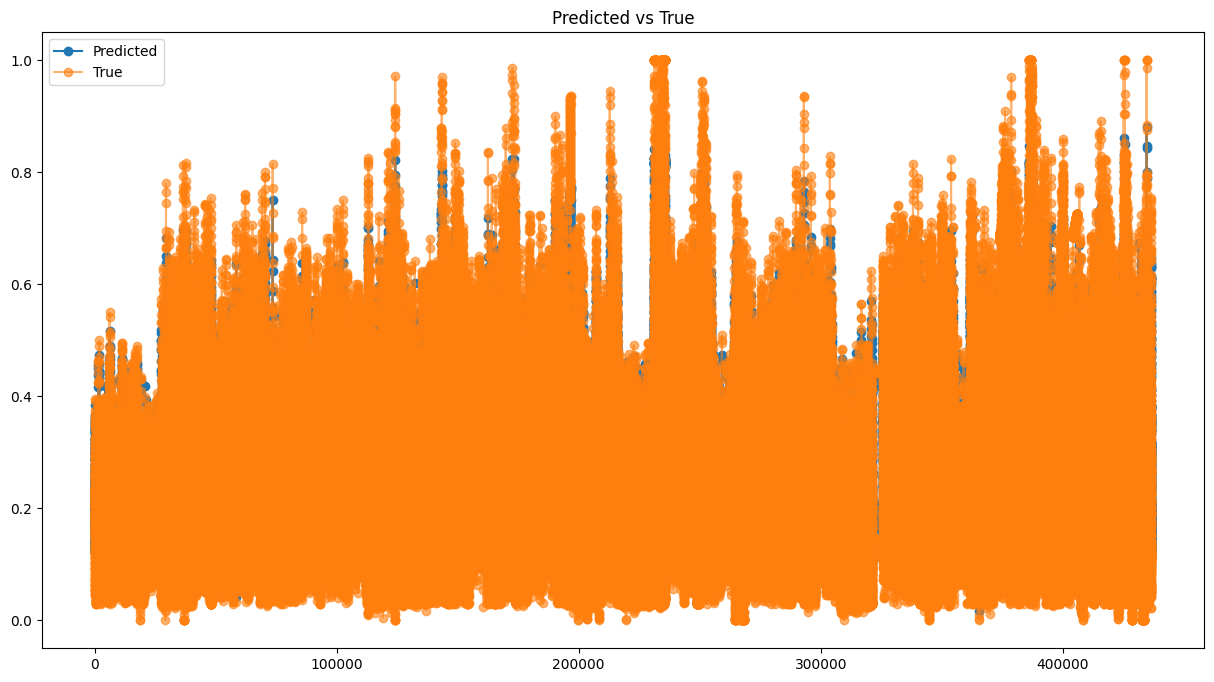

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028518500323700808,
 'mse': 0.0375947161942616,
 'rmse': 0.0014133626857270756}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          137.953278
1          137.011765
2          136.965393
3          136.312286
4          151.081741
...               ...
436598     130.738510
436599     166.279739
436600     199.722031
436601     202.193222
436602     220.128952

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  137.953278
2023-01-01 00:15:00   140.0  137.011765
2023-01-01 00:30:00   139.0  136.965393
2023-01-01 00:45:00   145.0  136.312286
2023-01-01 01:00:00   159.0  151.081741
...                     ...         ...
2035-06-14 21:30:00   137.0  130.738510
2035-06-14 21:45:00   177.0  166.279739
2035-06-14 22:00:00   198.0  199.722031
2035-06-14 22:15:00   216.0  202.193222
2035-06-14 22:30:00   233.0  220.128952

[436603 rows x 2 columns]

AP, BE, EP: (0.945705699928081, 0.009567065657051503, 0.04472723441486755)


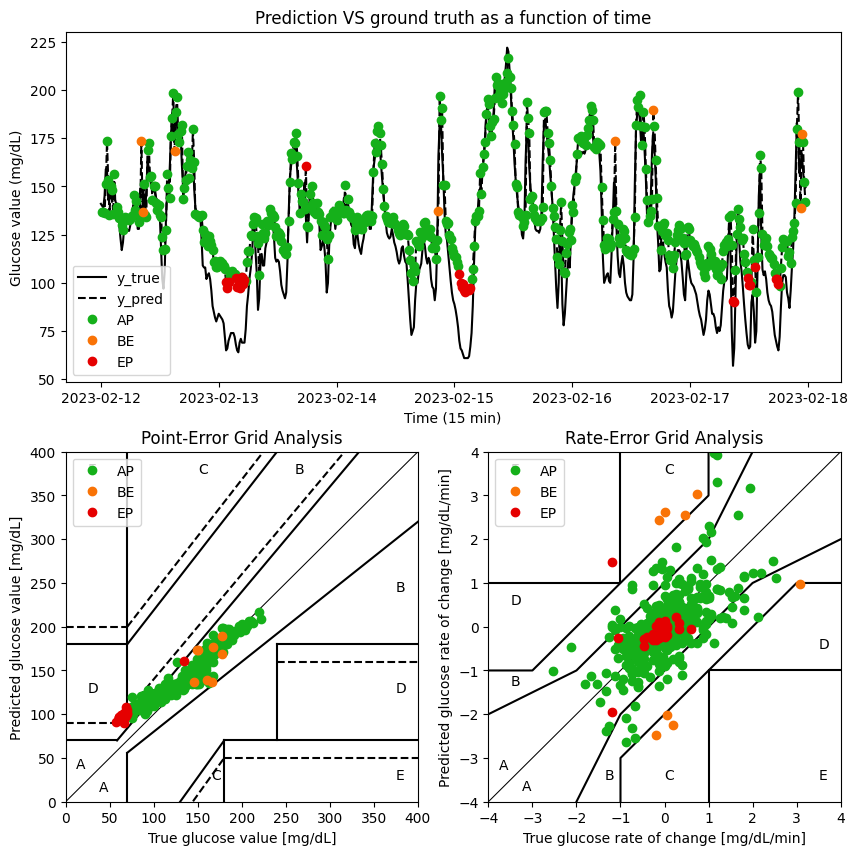

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  137.953278       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  137.011765 -0.066667 -0.062768     AP   
2      2023-02-12 00:30:00   139.0  136.965393 -0.066667 -0.003091     AP   
3      2023-02-12 00:45:00   145.0  136.312286  0.400000 -0.043540     AP   
4      2023-02-12 01:00:00   159.0  151.081741  0.933333  0.984630     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  130.738510  2.333333  1.346978     AP   
436599 2035-07-26 21:45:00   177.0  166.279739  2.666667  2.369415     AP   
436600 2035-07-26 22:00:00   198.0  199.722031  1.400000  2.229486     AP   
436601 2035-07-26 22:15:00   216.0  202.193222  1.200000  0.164746     AP   
436602 2035-07-26 22:30:00   233.0  220.128952  1.133333  1.195715     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     B  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 33ms/step


Glucose level Predict  Glucose level True
0               0.212942            0.219565
1               0.210895            0.217391

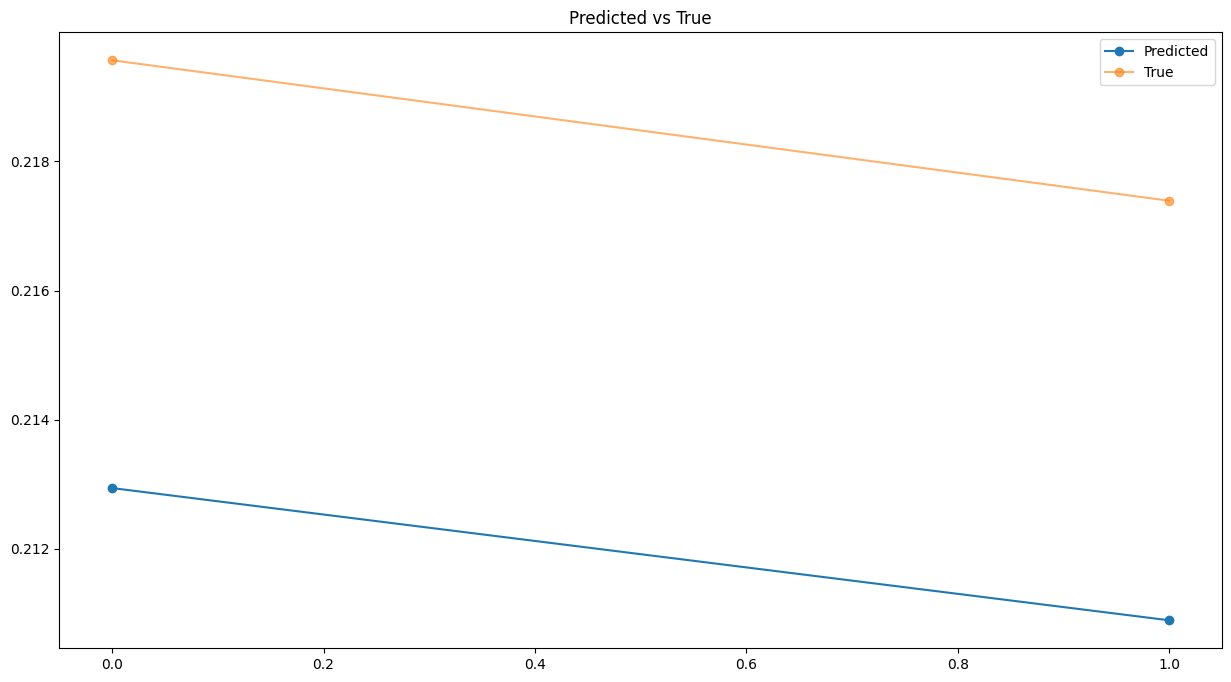

{'mae': 0.006559742922368272,
 'mse': 0.006560050841226688,
 'rmse': 4.303426703947897e-05}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             137.953278               141.0
1             137.011765               140.0

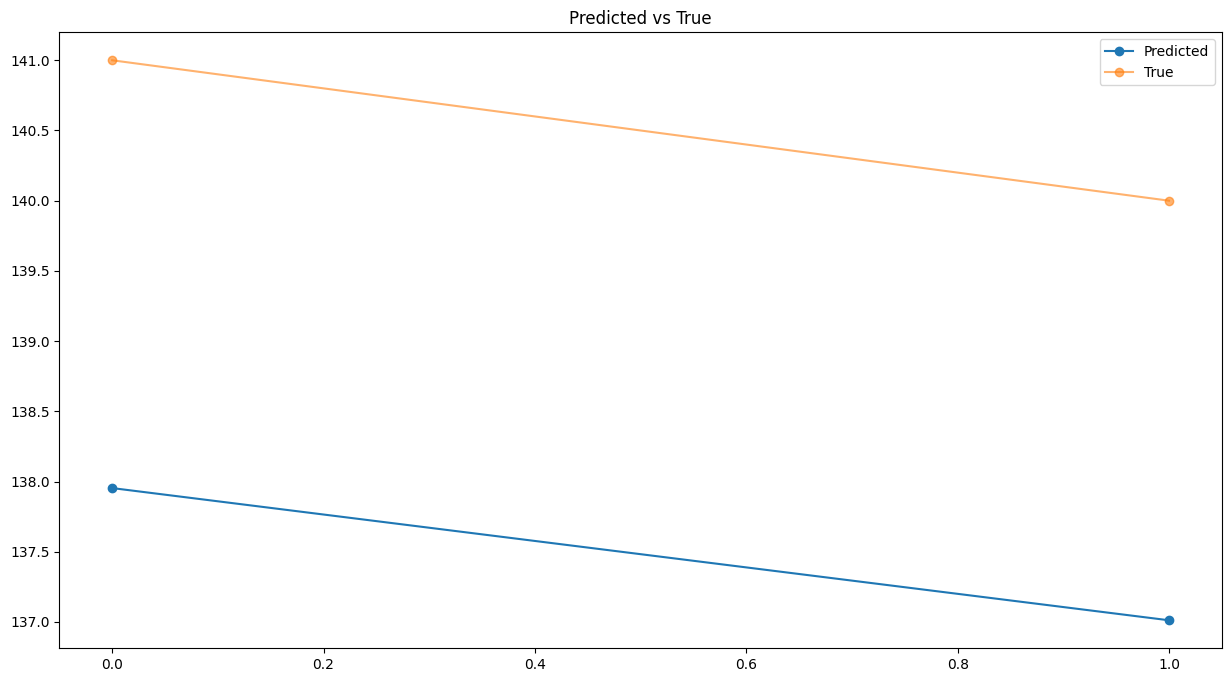

{'mae': 3.0174789428710938,
 'mse': 3.0176206440113615,
 'rmse': 9.106034351163544}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 33ms/step


Glucose level Predict  Glucose level True
0               0.212942            0.219565
1               0.206463            0.217391

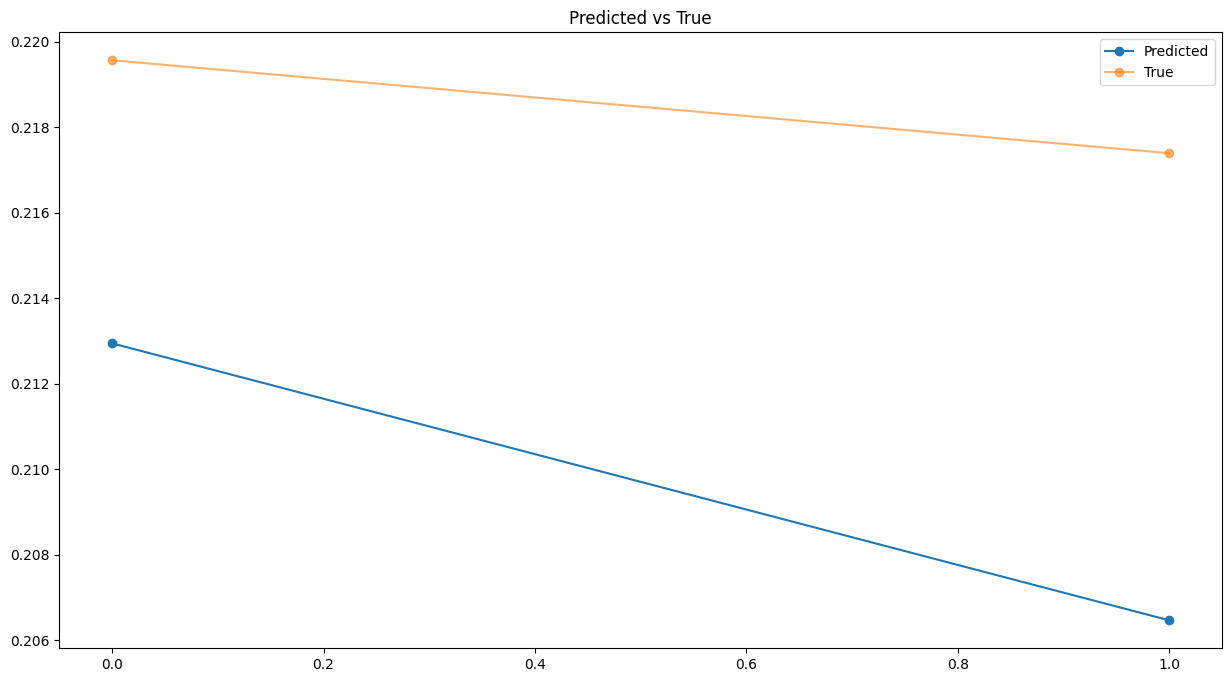

{'mae': 0.008775843615117296,
 'mse': 0.009035976095726582,
 'rmse': 8.16488640025422e-05}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             137.953278               141.0
1             134.972946               140.0

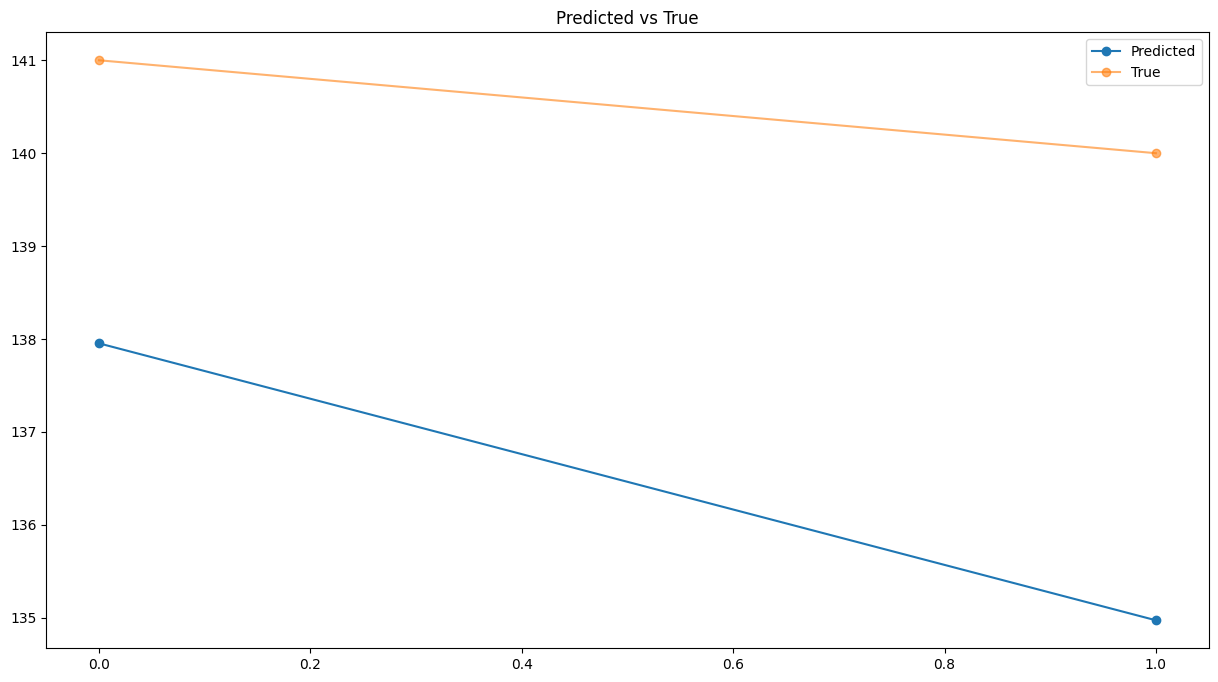

{'mae': 4.036888122558594,
 'mse': 4.156548309379317,
 'rmse': 17.276893848204054}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.224570            0.182609
1               0.186530            0.154348
2               0.181848            0.152174
3               0.184893            0.150000
4               0.183023            0.123913

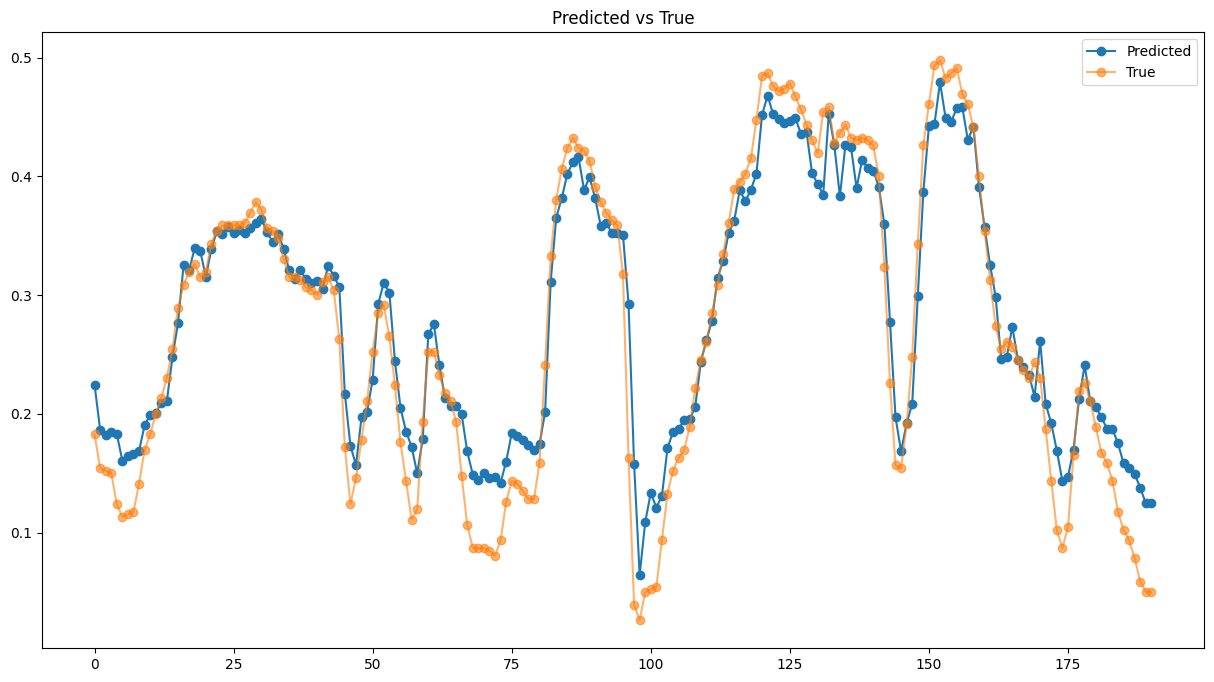

{'mae': 0.026637854504606977,
 'mse': 0.03462496630151489,
 'rmse': 0.0011988882913810416}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

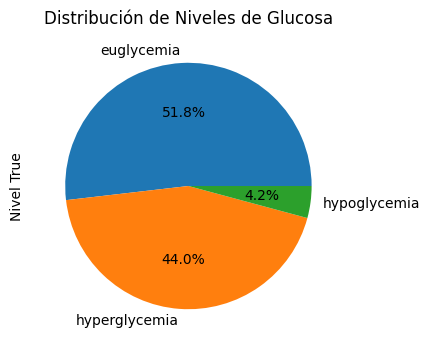

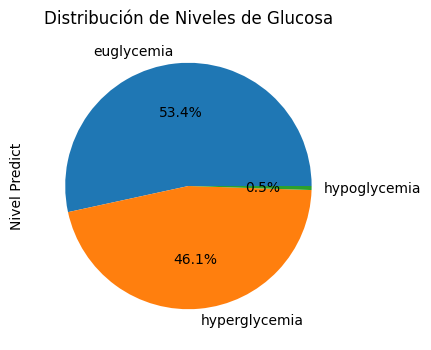

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             143.302124    euglycemia
1               111.0  euglycemia             125.804024    euglycemia
2               110.0  euglycemia             123.649918    euglycemia
3               109.0  euglycemia             125.050568    euglycemia
4                97.0  euglycemia             124.190712    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


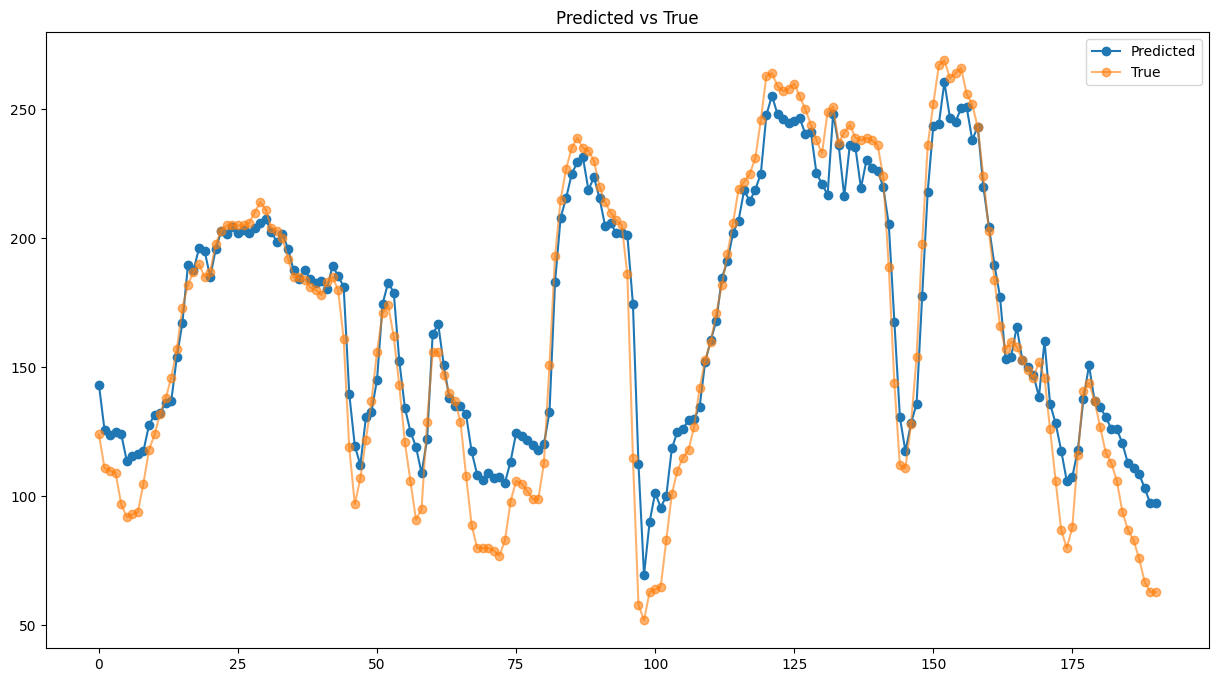

{'mae': 12.253413574857861,
 'mse': 15.927484872907856,
 'rmse': 253.68477437670856}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  143.302124
2023-01-01 00:15:00   111.0  125.804024
2023-01-01 00:30:00   110.0  123.649918
2023-01-01 00:45:00   109.0  125.050568
2023-01-01 01:00:00    97.0  124.190712
...                     ...         ...
2023-01-02 22:30:00    83.0  110.978889
2023-01-02 22:45:00    76.0  108.695000
2023-01-02 23:00:00    67.0  103.290154
2023-01-02 23:15:00    63.0   97.294159
2023-01-02 23:30:00    63.0   97.271889

[191 rows x 2 columns]

AP, BE, EP: (0.9578947368421052, 0.005263157894736842, 0.03684210526315789)


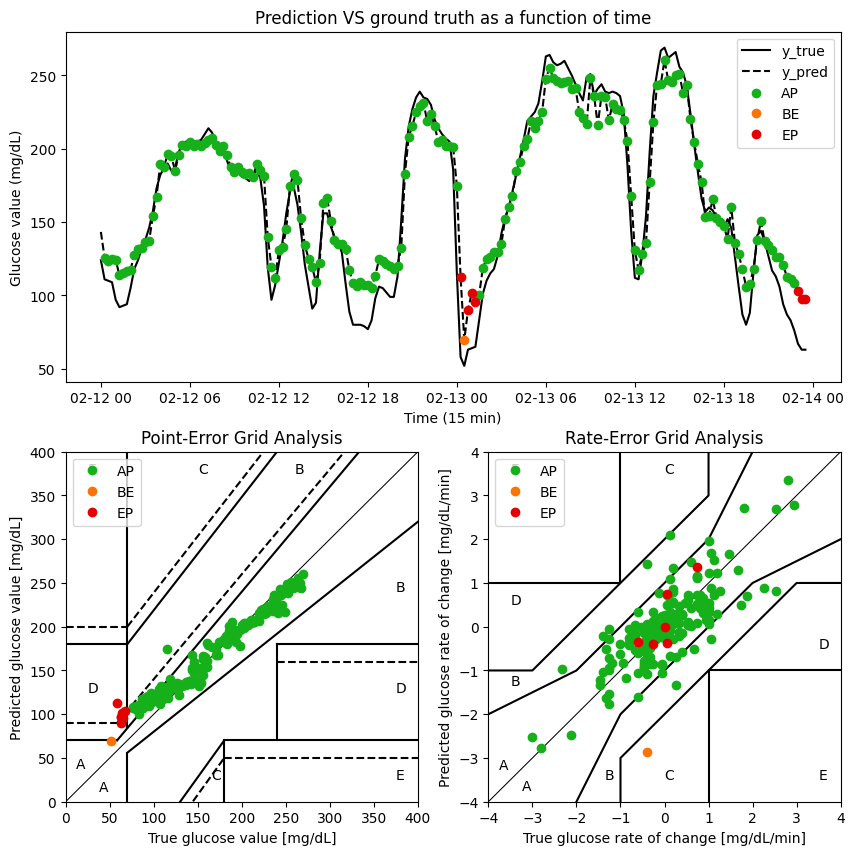

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 5ms/step


Glucose level Predict  Glucose level True
0               0.357086            0.373913
1               0.368527            0.400000
2               0.388858            0.404348
3               0.380197            0.406522
4               0.385152            0.397826

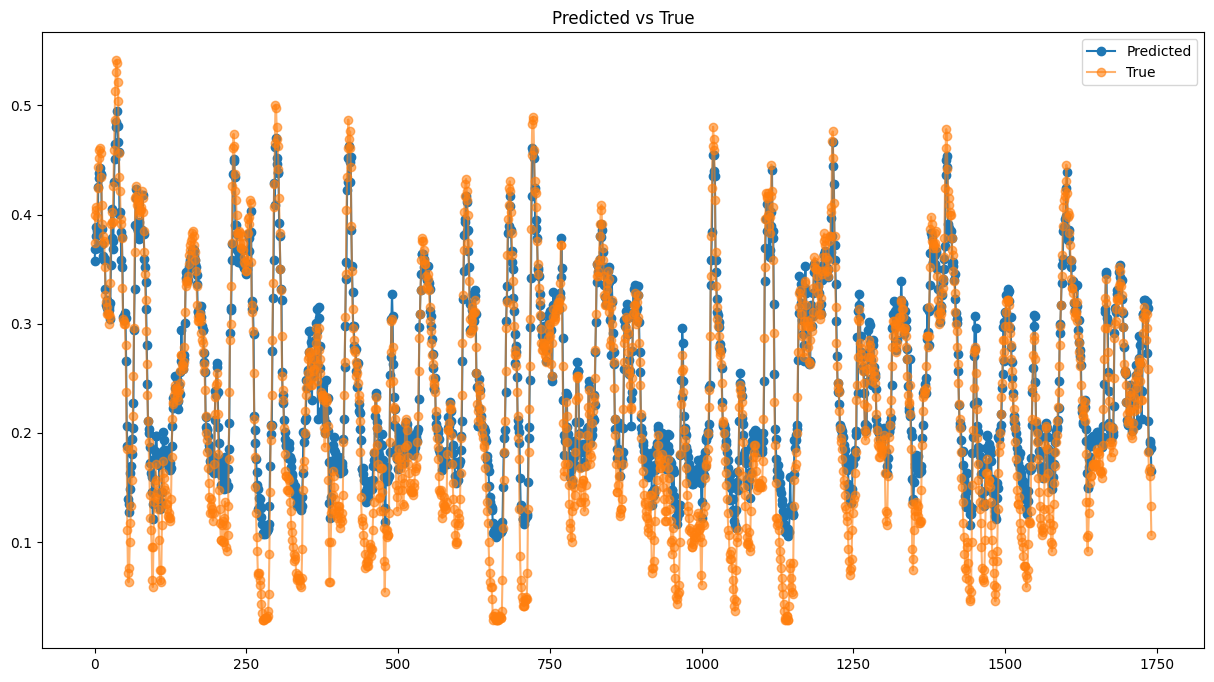

{'mae': 0.027147068193908788,
 'mse': 0.03494505663447003,
 'rmse': 0.0012211569831863179}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

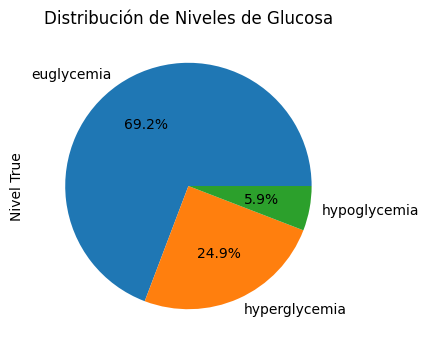

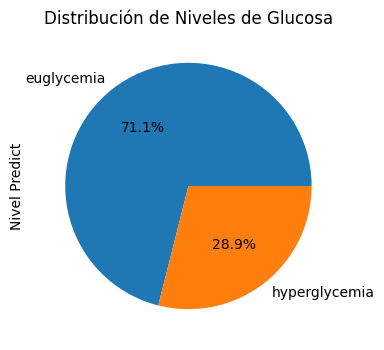

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             204.259369  hyperglycemia
1               224.0  hyperglycemia             209.522232  hyperglycemia
2               226.0  hyperglycemia             218.874878  hyperglycemia
3               227.0  hyperglycemia             214.890656  hyperglycemia
4               223.0  hyperglycemia             217.169937  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


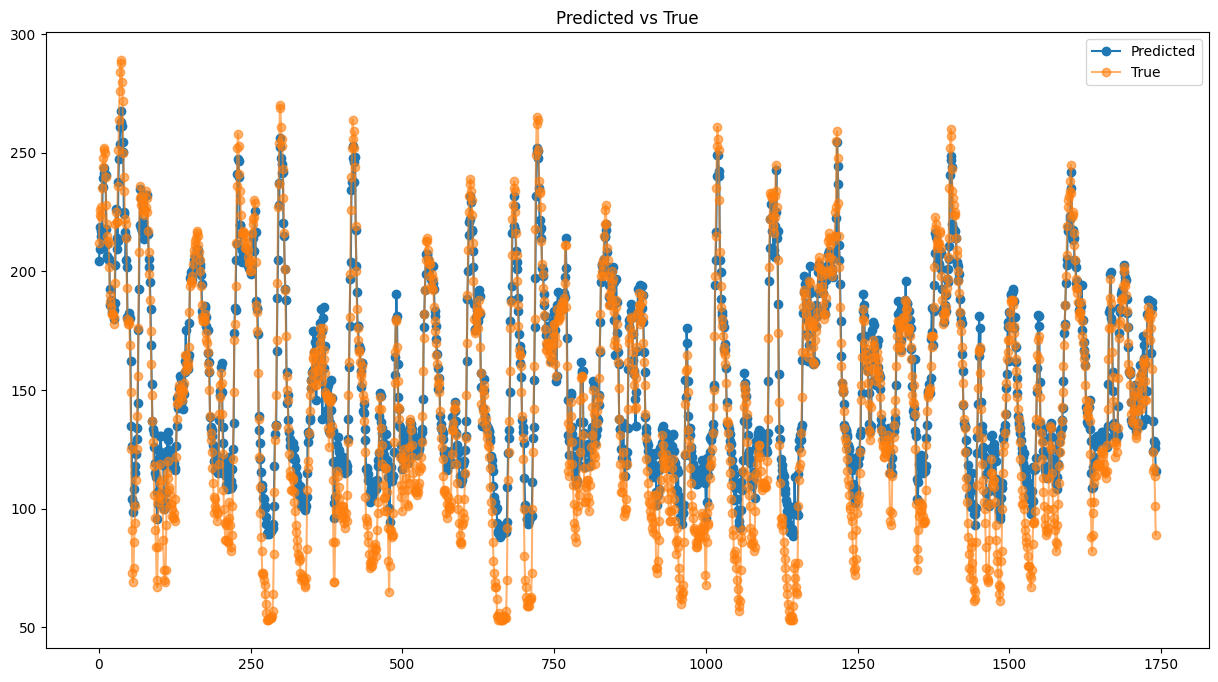

{'mae': 12.487651704072132,
 'mse': 16.07472582489426,
 'rmse': 258.3968103455224}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  204.259369
2023-01-01 00:15:00   224.0  209.522232
2023-01-01 00:30:00   226.0  218.874878
2023-01-01 00:45:00   227.0  214.890656
2023-01-01 01:00:00   223.0  217.169937
...                     ...         ...
2023-01-19 02:15:00   116.0  124.511902
2023-01-19 02:30:00   117.0  128.669586
2023-01-19 02:45:00   114.0  127.835335
2023-01-19 03:00:00   101.0  125.406456
2023-01-19 03:15:00    89.0  115.829628

[1742 rows x 2 columns]

AP, BE, EP: (0.9379666858127513, 0.0034462952326249283, 0.05858701895462378)


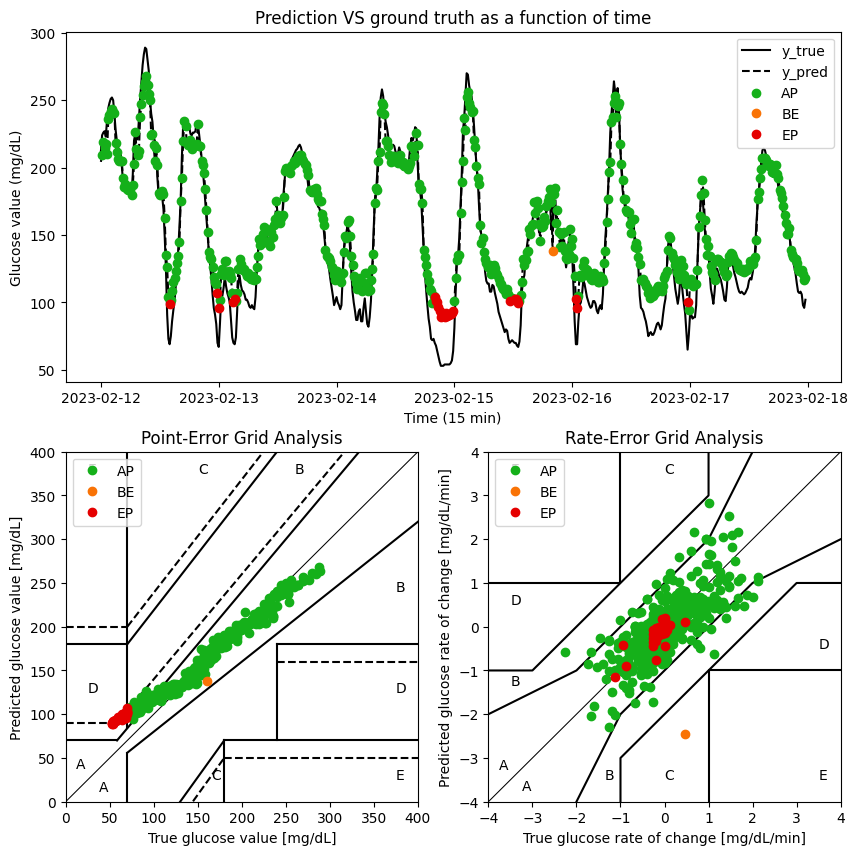

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 5ms/step


Glucose level Predict  Glucose level True
0               0.279833            0.261858
1               0.233960            0.229051
2               0.206102            0.196245
3               0.197444            0.163439
4               0.180724            0.130632

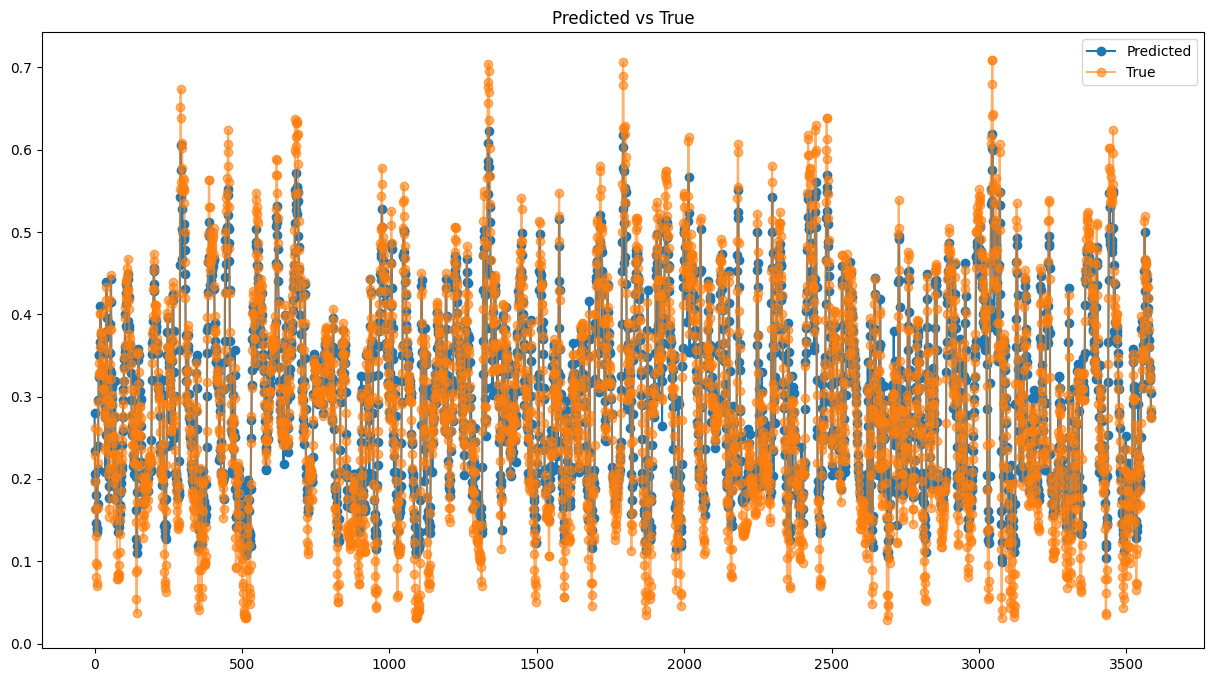

{'mae': 0.02635845785664873,
 'mse': 0.034180568433047474,
 'rmse': 0.0011683112584062413}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

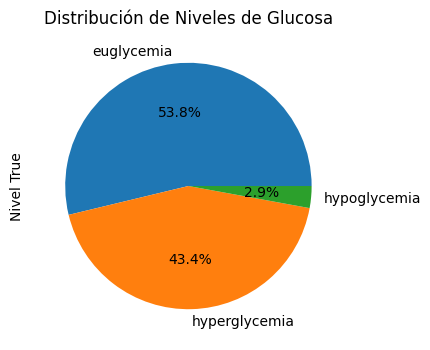

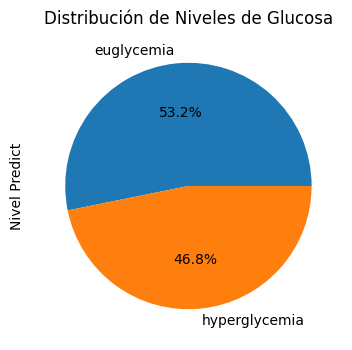

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             168.722961    euglycemia
1          145.363636  euglycemia             147.621368    euglycemia
2          130.272727  euglycemia             134.806763    euglycemia
3          115.181818  euglycemia             130.824188    euglycemia
4          100.090909  euglycemia             123.133179    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


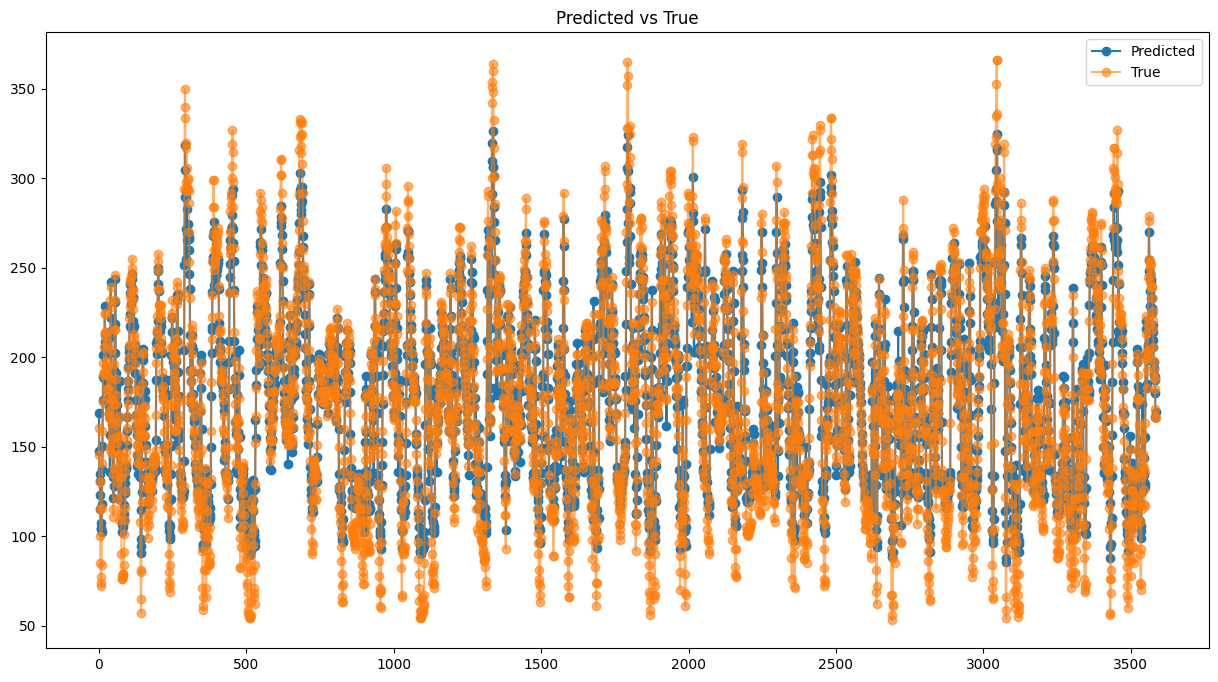

{'mae': 12.124891638523634,
 'mse': 15.723062356086585,
 'rmse': 247.214689853387}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  168.722961
2023-01-01 00:15:00  145.363636  147.621368
2023-01-01 00:30:00  130.272727  134.806763
2023-01-01 00:45:00  115.181818  130.824188
2023-01-01 01:00:00  100.090909  123.133179
...                         ...         ...
2023-02-07 07:15:00  188.000000  187.425247
2023-02-07 07:30:00  182.000000  188.725296
2023-02-07 07:45:00  171.000000  180.260162
2023-02-07 08:00:00  167.000000  166.768066
2023-02-07 08:15:00  166.000000  169.225159

[3586 rows x 2 columns]

AP, BE, EP: (0.9528591352859135, 0.016736401673640166, 0.030404463040446306)


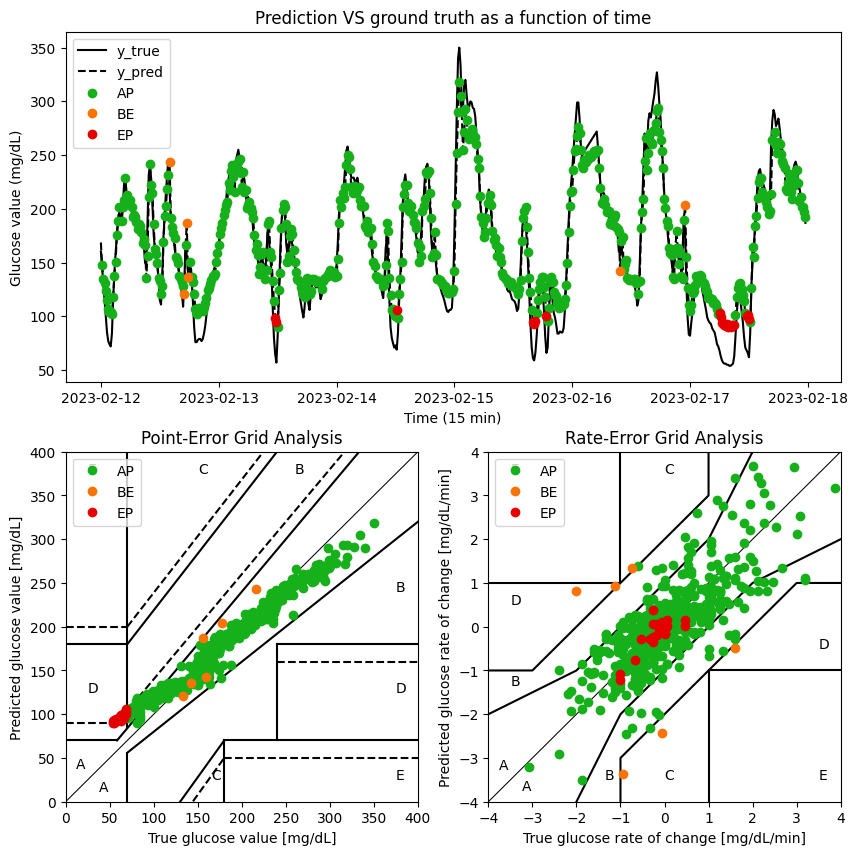

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 5ms/step


Glucose level Predict  Glucose level True
0               0.492256            0.534783
1               0.476654            0.500000
2               0.444541            0.484783
3               0.451804            0.463043
4               0.427002            0.428261

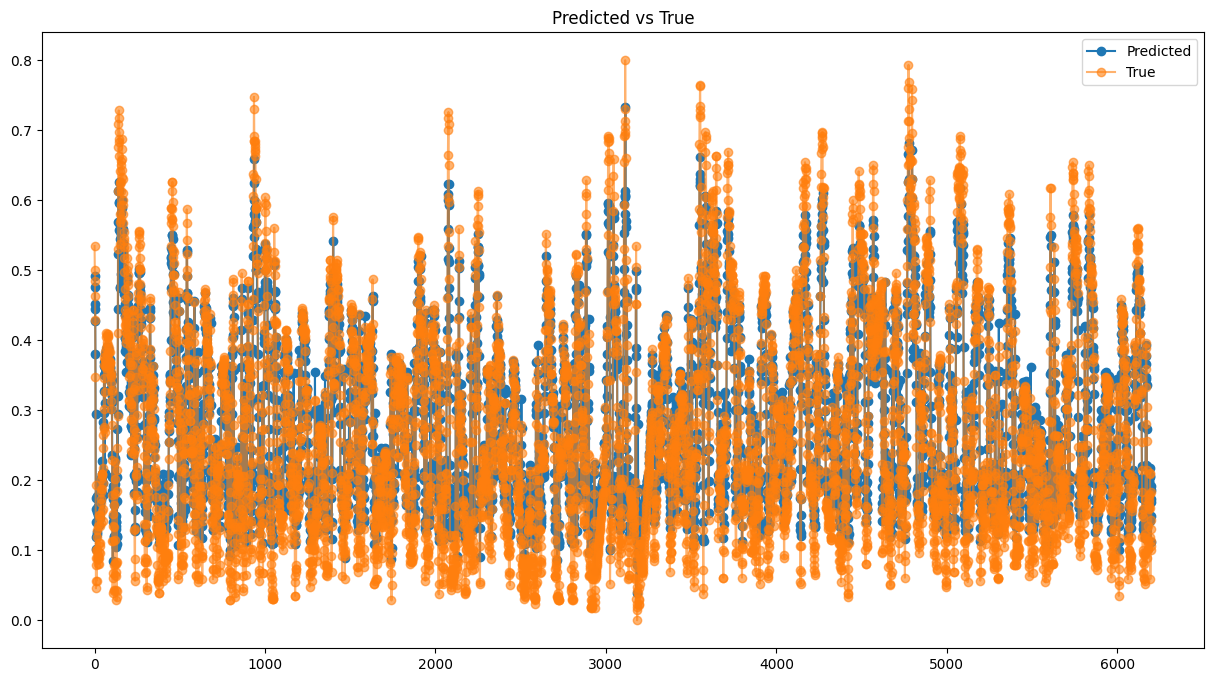

{'mae': 0.033815261531921596,
 'mse': 0.04251365544148014,
 'rmse': 0.0018074108989968943}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

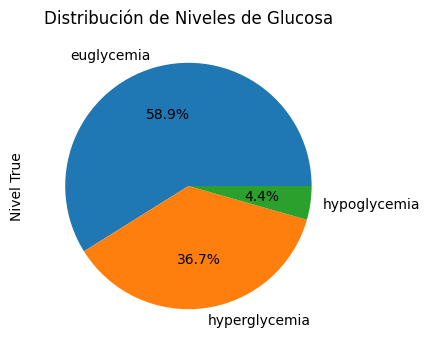

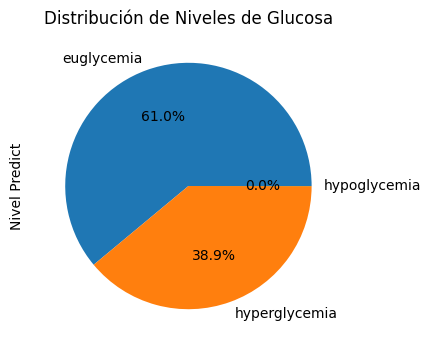

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             266.437866  hyperglycemia
1               270.0  hyperglycemia             259.261017  hyperglycemia
2               263.0  hyperglycemia             244.489090  hyperglycemia
3               253.0  hyperglycemia             247.829987  hyperglycemia
4               237.0  hyperglycemia             236.420776  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


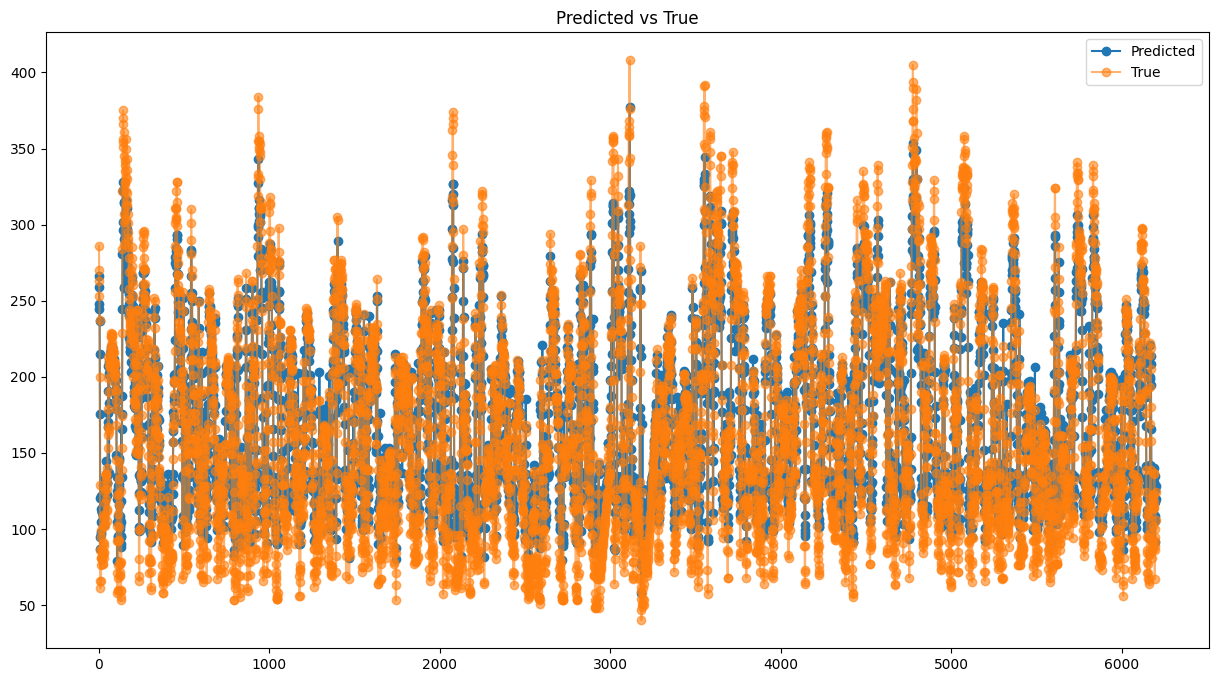

{'mae': 15.55502103173372, 'mse': 19.55628239538596, 'rmse': 382.4481811280828}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  266.437866
2023-01-01 00:15:00   270.0  259.261017
2023-01-01 00:30:00   263.0  244.489090
2023-01-01 00:45:00   253.0  247.829987
2023-01-01 01:00:00   237.0  236.420776
...                     ...         ...
2023-03-06 13:00:00   100.0  125.925331
2023-03-06 13:15:00    89.0  117.626793
2023-03-06 13:30:00    92.0  108.439522
2023-03-06 13:45:00   106.0  119.535423
2023-03-06 14:00:00   124.0  128.074509

[6201 rows x 2 columns]

AP, BE, EP: (0.9309677419354838, 0.021774193548387097, 0.04725806451612903)


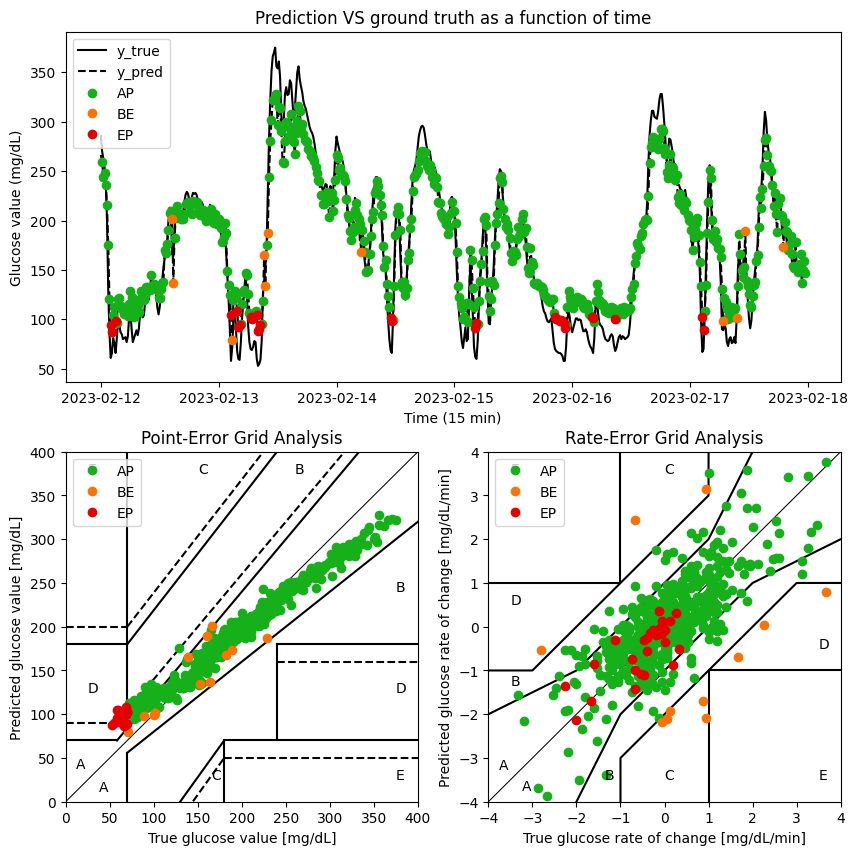

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)